In [1]:
from cobaya.model import get_model
from cobaya.run import run
import yaml
import os

import numpy as np

In [2]:
# Read in the yaml file
config_fn = 'test_wisc.yaml'
with open(config_fn, "r") as fin:
    info = yaml.load(fin, Loader=yaml.FullLoader)


In [3]:
model = get_model(info)

[model] *WARNING* Ignored blocks/options: ['force', 'sampler', 'output']


In [4]:
p0 = {}
for p in info['params']:
     if isinstance(info['params'][p], dict):
         if 'ref' in info['params'][p]:
             p0[p] = info['params'][p]['ref']['loc']
#os.system('mkdir -p ' + info['output'])

In [5]:
p0

{'sigma8': 0.81, 'Omega_c': 0.27}

In [6]:
loglikes, derived = model.loglikes(p0)
print("chi2 = ", -2 * loglikes[0])

TypeError: Cosmology.__init__() got an unexpected keyword argument 'baryons_power_spectrum'

In [17]:
s8s = np.linspace(0.4, 0.9, 100)
Oc = 0.27

chi2s = np.zeros(100)

for is8, s8 in enumerate(s8s):
    print(is8, s8)
    p = {'sigma8': s8, 'Omega_c': Oc}
    ll, _ = model.loglikes(p)
    chi2s[is8] = -2*ll[0]

0 0.4
1 0.40505050505050505
2 0.41010101010101013
3 0.41515151515151516
4 0.42020202020202024
5 0.42525252525252527
6 0.4303030303030303
7 0.4353535353535354
8 0.4404040404040404
9 0.4454545454545455
10 0.4505050505050505
11 0.4555555555555556
12 0.46060606060606063
13 0.46565656565656566
14 0.47070707070707074
15 0.47575757575757577
16 0.48080808080808085
17 0.4858585858585859
18 0.49090909090909096
19 0.495959595959596
20 0.501010101010101
21 0.5060606060606061
22 0.5111111111111112
23 0.5161616161616162
24 0.5212121212121212
25 0.5262626262626263
26 0.5313131313131314
27 0.5363636363636364
28 0.5414141414141415
29 0.5464646464646465
30 0.5515151515151515
31 0.5565656565656566
32 0.5616161616161617
33 0.5666666666666667
34 0.5717171717171717
35 0.5767676767676768
36 0.5818181818181818
37 0.5868686868686869
38 0.591919191919192
39 0.596969696969697
40 0.6020202020202021
41 0.6070707070707071
42 0.6121212121212122
43 0.6171717171717173
44 0.6222222222222222
45 0.6272727272727273
46 0.6

In [20]:
import matplotlib.pyplot as plt

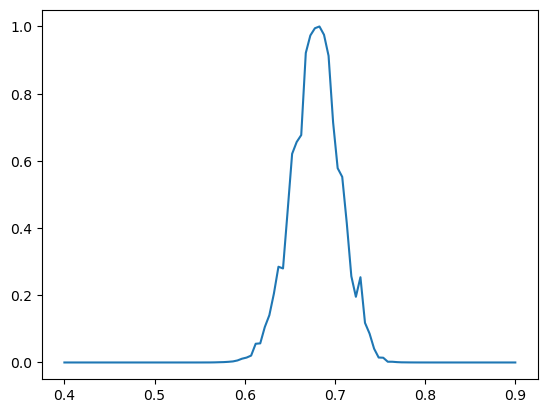

In [22]:
plt.plot(s8s, np.exp(-0.5*(chi2s-np.amin(chi2s))))

In [27]:
chi2s

array([166.20041334, 162.18932227, 160.55759799, 157.36994128,
       156.52999833, 153.19201288, 150.74467234, 148.26372655,
       146.19944322, 144.15487917, 141.30979399, 139.28566664,
       137.58311176, 133.78455886, 132.59378842, 130.30638342,
       128.54314882, 126.93686629, 123.69522602, 122.80727632,
       119.8404242 , 117.98269124, 116.8032349 , 114.77103518,
       114.07603836, 111.73552186, 109.81294208, 108.42730817,
       107.40146935, 105.92337529, 104.33041372, 102.38079988,
       101.71149913,  99.68765293,  98.06162726,  97.26239533,
        96.15505836,  95.20490251,  93.89609805,  92.65116271,
        92.13376148,  91.44918241,  89.44955398,  89.40802948,
        88.17509183,  87.59716006,  86.84333032,  86.18527142,
        86.22233723,  85.27835337,  84.62771967,  84.51745938,
        84.45539989,  83.83895469,  83.72905402,  83.68539555,
        83.67484015,  83.72488417,  83.8572991 ,  84.34795714,
        84.77048343,  84.86182849,  85.43496645,  86.39

In [23]:
import pyccl as ccl
cosmo = ccl.CosmologyVanillaLCDM()

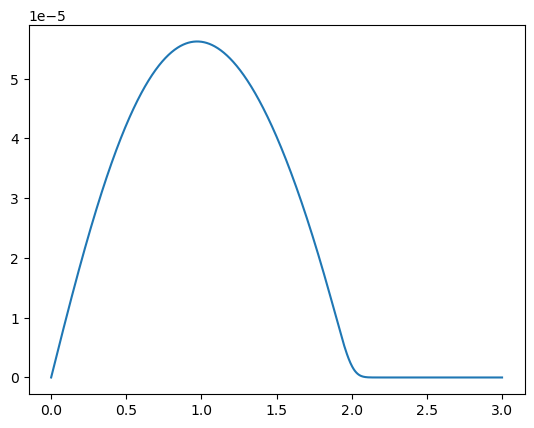

In [26]:
z = np.linspace(0, 3, 1024)
nz = np.exp(-0.5*((z-2.0)/0.05)**2)
t = ccl.WeakLensingTracer(cosmo, dndz=(z, nz))
chi = ccl.comoving_radial_distance(cosmo, 1/(1+z))
qs = t.get_kernel(chi)[0]
plt.plot(z, qs)

In [ ]:
ls = np.linspace(2, 2000, 200)
cl = ccl.angu